# Tutorial 1: Understanding Deep Learning from scratch

## Step 1 : Creating the data set using numpy array of 0s and 1s.

In [ ]:
a = [
    0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1
]

b = [
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0
]

c = [
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0
]

# label for each letter
y = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

## Step 2 : Visualization of data set

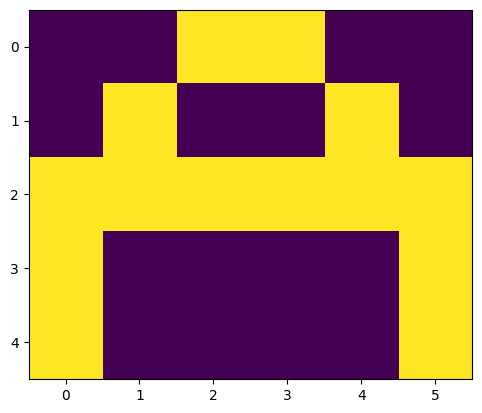

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(a).reshape(5, 6))
plt.show()

# plt.imshow(np.array(b).reshape(5, 6))
# plt.show()

# plt.imshow(np.array(c).reshape(5, 6))
# plt.show()

## Step 3 :As the data set is in the form of list we will convert it into numpy array.

In [ ]:
x = [
    np.array(a).reshape(1, 30),
    np.array(b).reshape(1, 30),
    np.array(c).reshape(1, 30)
]
print(x)

y = np.array(y)
print(y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


## Step 4 : Defining the architecture or structure of the deep neural network. This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure.

In [ ]:
"""
1st layer: Input layer(1, 30)
2nd layer: Hidden layer (1, 5)
3rd layer: Output layer(3, 3)
"""

'\n1st layer: Input layer(1, 30)\n2nd layer: Hidden layer (1, 5)\n3rd layer: Output layer(3, 3)\n'

## Step 5: Declaring and defining all the function to build deep neural network.

In [ ]:
# activation function

def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

# Creating feed forward neural network
# IL: (1, 30)
# HL: (1, 5)
# OL: (3, 3)

def f_forward(x, w1, w2):
  # Hidden
  z1 = x.dot(w1) # Input from layer 1
  a1 = sigmoid(z1) # Output of layer 2

  # Output Layer
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  return (a2)

# Initialize the weights randomly
def generate_wt(x, y):
  l = []
  for i in range(x * y):
    l.append(np.random.randn())

  return (np.array(l).reshape(x, y))

# MSE for loss
def loss(out, Y):
  s = (np.square(out-Y))
  s = np.sum(s) / len(y)

  return (s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
  # hidden layer
  z1 = x.dot(w1)  # input from layer 1
  a1 = sigmoid(z1) # output of layer 2

  # output layer
  z2 = a1.dot(w2) # input of out layer
  a2 = sigmoid(z2) # output of out layer

  # error in output layer
  d2 = (a2-y)
  d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))

  # Gradient for w1 and w2
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)

  # Updating parameters
  w1 = w1-(alpha * (w1_adj))
  w2 = w2-(alpha * (w2_adj))

  return (w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
  acc = []
  losss = []
  for j in range(epoch):
    l = []
    for i in range(len(x)):
      out = f_forward(x[i], w1, w2)
      l.append((loss(out, Y[i])))
      w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
    print("epochs: ", j + 1, " ========= acc ", (1 - (sum(l) / len(x))) * 100)
    acc.append((1 - (sum(l) / len(x))) * 100)
    losss.append(sum(l) / len(x))

  return (acc, losss, w1, w2)

def predict(x, w1, w2):
  Out = f_forward(x, w1, w2)
  maxm = 0
  k = 0
  for i in range(len(Out[0])):
    if (maxm < Out[0][i]):
      maxm = Out[0][i]
      k = i

  if (k == 0):
    print("Image is of letter A")
  elif (k == 1):
    print("Image is of letter B")
  else:
    print("Image is of letter C")

  plt.imshow(x.reshape(5, 6))
  plt.show()

## Step 6: Initializing the weights, as the neural network is having 3 layers, so there will be 2 weight matrix associate with it. The size of each matrix depends on the number of nodes in two connecting layers.

In [ ]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.86141289  1.31311491  0.25354444  0.2295071  -0.16800891]
 [-1.01601699  1.62976277  1.01924355 -0.60515865  1.93325368]
 [-0.21865639 -0.95304163  1.83791713 -1.01896945  0.92202104]
 [ 0.55110872  0.32645652  1.08605399  1.83112538  0.64726401]
 [-0.19347905 -1.10946319 -0.28013548 -2.19064839 -2.16500045]
 [-2.28101438 -1.12644546 -1.37329246  0.29327425 -0.12471452]
 [ 0.28802465  0.93557249 -0.05976387 -1.29122271 -0.66538929]
 [ 0.86276023  0.08542315 -1.74575906  0.63314347 -1.05878634]
 [-0.06342186  1.29912891 -0.18001589  0.36598033 -0.37848316]
 [ 0.86567333  0.17526554  0.06626317 -1.30131523 -0.52046486]
 [ 2.4002362   1.67587936  0.88564009 -0.81899635  1.38893356]
 [-0.5004114  -0.08985725  0.24682337  1.36511658  0.74429194]
 [-0.59158256  0.03438893  0.70783217 -0.20629457 -0.49100456]
 [ 0.28001736 -0.434023   -1.73852163  0.37982177  1.89792323]
 [-1.25560085  0.16038067 -0.53616428 -0.20412267  1.06900735]
 [-1.71667783  1.46201996 -0.19825251 -0.23872163 -0.56

## Step 7 : Training the model.

In [ ]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs:  1  ========= acc  65.37295345086977
epochs:  2  ========= acc  69.60161467642023
epochs:  3  ========= acc  72.96833642484104
epochs:  4  ========= acc  75.58440043366117
epochs:  5  ========= acc  77.62127474684434
epochs:  6  ========= acc  79.22551984293509
epochs:  7  ========= acc  80.50397756921421
epochs:  8  ========= acc  81.53566907049972
epochs:  9  ========= acc  82.38199462222427
epochs:  10  ========= acc  83.09087007469455
epochs:  11  ========= acc  83.69872952793474
epochs:  12  ========= acc  84.23253529873669
epochs:  13  ========= acc  84.711890492286
epochs:  14  ========= acc  85.15092531115364
epochs:  15  ========= acc  85.55979044290638
epochs:  16  ========= acc  85.94575591571898
epochs:  17  ========= acc  86.31398782476276
epochs:  18  ========= acc  86.66809089897993
epochs:  19  ========= acc  87.01049516868675
epochs:  20  ========= acc  87.3427469661093
epochs:  21  ========= acc  87.66574462701334
epochs:  22  ========= acc  87.97994014294778


## Step 8 : Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration).

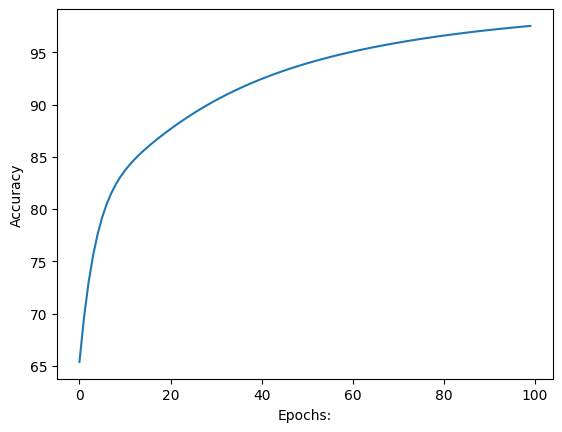

In [ ]:
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs:')
plt.show()

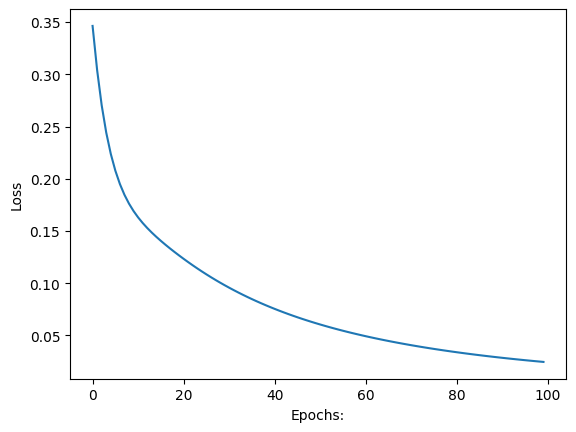

In [ ]:
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel('Epochs:')
plt.show()

In [ ]:
# the trained weights are
print(w1, "\n", w2)

[[-0.86141289  1.31311491  0.25354444  0.2295071  -0.16800891]
 [-1.36693498  1.6513533   1.17711354 -0.78435263  1.96891551]
 [-0.12800688 -0.88909867  2.010237   -1.17258014  0.53788064]
 [ 0.64175823  0.39039948  1.25837386  1.67751468  0.26312362]
 [-0.54439704 -1.08787265 -0.12226549 -2.36984237 -2.12933861]
 [-2.28101438 -1.12644546 -1.37329246  0.29327425 -0.12471452]
 [ 0.28802465  0.93557249 -0.05976387 -1.29122271 -0.66538929]
 [ 0.95340974  0.14936612 -1.57343919  0.47953278 -1.44292674]
 [-0.06342186  1.29912891 -0.18001589  0.36598033 -0.37848316]
 [ 0.86567333  0.17526554  0.06626317 -1.30131523 -0.52046486]
 [ 2.91582604  1.68993907 -0.28036088 -0.86754629  1.02386738]
 [-0.5004114  -0.08985725  0.24682337  1.36511658  0.74429194]
 [-0.15001506  0.07674136  0.72228205 -0.18071128 -0.91080679]
 [ 0.37066688 -0.37008003 -1.56620176  0.22621108  1.51378283]
 [-0.74001101  0.17444038 -1.70216525 -0.25267261  0.70394117]
 [-1.201088    1.47607968 -1.36425348 -0.28727156 -0.92

## Step 9: Making Prediction

Image is of letter B


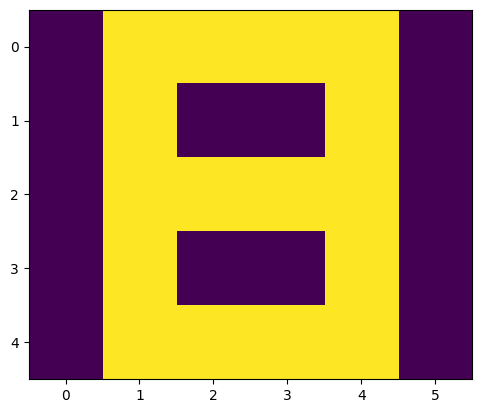

In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)

Image is of letter A


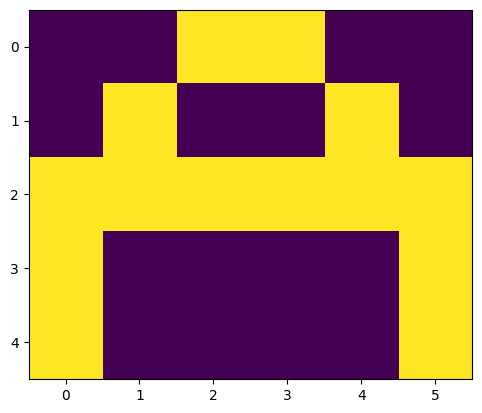

Image is of letter C


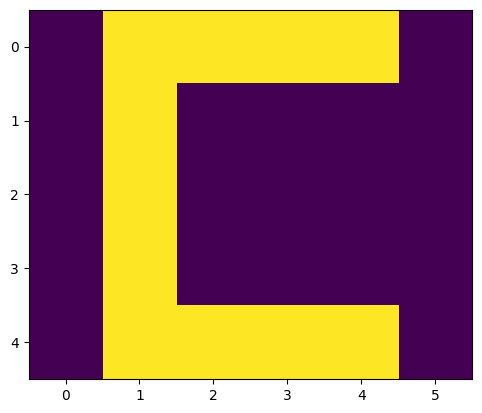

In [ ]:
predict(x[0], w1, w2)
predict(x[2], w1, w2)

# Tutorial 2: Introduction to Deep Neural Networks (DNN)

## Step 1: Import required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import Flatten, MaxPooling2D

In [ ]:
# Creating the model
DNN_Model = Sequential()
DNN_Model

In [ ]:
# Inputting the shape to the model
DNN_Model.add(Input(shape = (256, 256, 3)))

# Creating the deep neural network
DNN_Model.add(Conv2D(256, (3, 3), activation='relu', padding = "same"))
DNN_Model.add(MaxPooling2D(2, 2))
DNN_Model.add(Conv2D(128, (3, 3), activation='relu', padding = "same"))
DNN_Model.add(MaxPooling2D(2, 2))
DNN_Model.add(Conv2D(64, (3, 3), activation='relu', padding = "same"))
DNN_Model.add(MaxPooling2D(2, 2))

# Creating the output layers
DNN_Model.add(Flatten())
DNN_Model.add(Dense(64, activation='relu'))
DNN_Model.add(Dense(10))

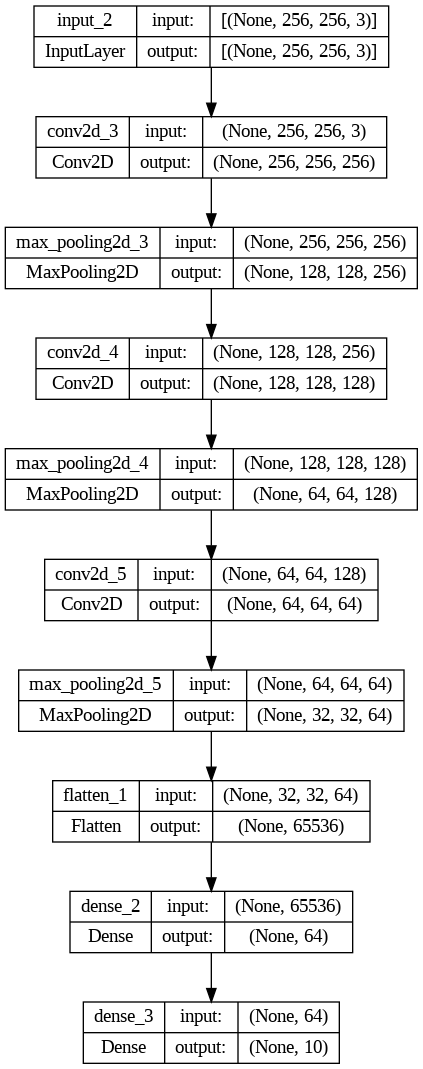

In [ ]:
tf.keras.utils.plot_model(DNN_Model, to_file='model_big.png', show_shapes=True)



# Tutorial 3: Implementing a Deep Neural Network from scratch

https://webcache.googleusercontent.com/search?q=cache:https://medium.com/analytics-vidhya/implementing-a-deep-neural-network-from-scratch-8ed9988d2e4d

## Step 1: Import packages / Libraries

In [ ]:
import numpy as np
import tensorflow.keras.datasets as tfkd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Step 2: Load the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tfkd.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


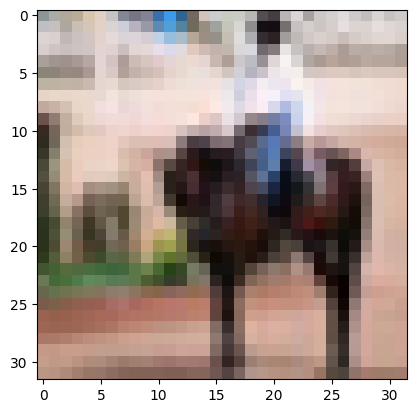

In [ ]:
plt.imshow(x_train[11])

In [ ]:
print(f"Training Dataset Shapes: {x_train.shape}, {y_train.shape}")
print(f"Test Dataset Shapes: {x_test.shape}, {y_test.shape}")

Training Dataset Shapes: (50000, 32, 32, 3), (50000, 1)
Test Dataset Shapes: (10000, 32, 32, 3), (10000, 1)


## Step 3: Defining utility function for pre-processing the dataset

In [ ]:
def preprocess_X(data):
  # Reshape the image vector, by using "-1" we flatten the channels of the image
  processed_x = data.reshape(data.shape[0], -1)
  # Normalize the data to be between the range 0 and 1
  processed_x = processed_x / 255.0
  processed_x = processed_x.T
  return processed_x

### X & Y Train Preprocessed

In [ ]:
x_train_preprocessed = preprocess_X(x_train)
print(x_train_preprocessed.shape)

x_test_preprocessed = preprocess_X(x_test)
print(x_test_preprocessed.shape)

(3072, 50000)
(3072, 10000)


In [ ]:
y_train = y_train.T
print(y_train.shape)

y_test = y_test.T
print(y_test.shape)

(1, 50000)
(1, 10000)


## Step 4: Building our DNN Model

### Initializing our parameters

The function takes the dimensions of all the layers as an argument and then returns a dictionary “parameters” that contains:

Randomly Initialized weights “w”
Initialized to zero biases “b”

In [ ]:
def init_params(dimensions):
  # dimensions: python list containing the dimensions of each layer in our network
  parameters = {}
  np.random.seed(3)

  # number of layers in the network
  L = len(dimensions)

  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.01
    parameters['b' + str(l)] = np.zeros((dimensions[l], 1))

  return parameters

### calculate activation functions

In [ ]:
def activation_function(z, activation_type):
  cache = z
  if activation_type == "sigmoid":
    sigmoid_of_Z = 1/(1+np.exp(-z))
    return sigmoid_of_Z, cache

  elif activation_type == "relu":
    relu_of_Z = (abs(z) + z )/2
    return relu_of_Z, cache

  elif activation_type == "softmax":
    e_Z = np.exp(z - np.max(z))
    return (e_Z / e_Z.sum()), cache

  elif activation_type == "tanh":
    tanh_of_Z = np.tanh(z)
    return tanh_of_Z, cache

  else:
    print(F"Error: wrong type of activation function defined. \n")
    print(F"Available: sigmoid, relu, tanh, and softmax.")

## Implementing Forward propagation

A: activation from previous layer (or input data): (size of prev layer, number of examples)

W: Weights matrix: numpy array of shape (size of current layer, size of prev layer)

b: bias vector, numpy array of shape (size of current layer, 1)

### forwardProp Preactivation

In [ ]:
def forward_prop_preactivations(A, W, b):
    z = np.dot(W, A) + b
    cache = (A, W, b)  # Cache contains A, W, and b
    return z, cache

### forwardProp activation

In [ ]:
def forwardProp_activations(A_previous, W, b, act_fn):
    z, cacheZ = forward_prop_preactivations(A_previous, W, b)
    A, cacheA = activation_function(z, act_fn)
    cache = (cacheZ, cacheA)  # Cache contains both pre-activation and activation caches
    return A, cache

### Forward Propagation

In [ ]:
def forwardPropagation(X, parameters, output_activation="sigmoid"):
  caches = []
  A = X
  L = len(parameters) // 2

  for l in range(1, L):
    A_previous = A

    W = parameters['W' + str(l)]
    b = parameters['b' + str(l)]
    A, cache = forwardProp_activations(A_previous, W, b, "relu")
    caches.append(cache)

  WL = parameters['W' + str(L)]
  bL = parameters['b' + str(L)]
  AL, cache = forwardProp_activations(A, WL, bL, output_activation)
  caches.append(cache)

  return AL, caches

## Step 5: Computing Loss

In [ ]:
def compute_cost(AL, Y):
  m = Y.shape[1]
  logprobs = np.multiply(np.log(AL), Y) + np.multiply((1 - Y), np.log(1 - AL))
  cost = -np.sum(logprobs) / m

  return cost

## Step 6: Implementing backpropagation

### Activation Function Backward function

In [ ]:
def activation_function_backward(dA, cache, type_):
  Z = cache

  if type_ == "sigmoid":
    s = 1 / (1 + np.exp(-Z[0]))
    dZ = dA * s * (1 - s)
    return dZ

  elif type_ == "relu":
    dZ = np.array(dA, copy=True)
    # When Z <= 0, set dZ to 0
    dZ[Z <= 0] = 0
    return dZ

  elif type_ == "tanh":
    s = np.tanh(Z)
    dZ = dA * (1 - np.square(s))
    return dZ

  elif type_ == "softmax":
    return None
  else:
    print("Error: Unsupported activation function type")
    return None

### Backwardprop derivatives function

In [ ]:
def backwardprop_derivatives(dZ, cache):
    A_previous, W, b = cache
    m = A_previous.shape[1]
    dW = np.dot(dZ, A_previous.T) / m
    db = np.sum(dZ, axis=1, keepdims=True)
    dA_previous = np.dot(W.T, dZ)
    return dA_previous, dW, db

###backwardprop activation function

In [ ]:
def backwardProp_activation(dA, cache, act_fn):
  cacheZ, cacheA = cache  # Unpack the cache to obtain both pre-activation and activation caches
  dZ = activation_function_backward(dA, cacheZ, act_fn)
  dA_previous, dW, db = backwardprop_derivatives(dZ, cacheA)

  return dA_previous, dW, db

### backwardPropagation

In [ ]:
def backwardPropagation(AL, Y, caches):
  grads = {}
  m = AL.shape[1]
  Y = Y.reshape(AL.shape)
  L = len(caches)
  dAL = -(np.divide(Y, AL) - np.divide((1-Y),(1-AL)))

  cache = caches[L-1]
  grads["dA"+str(L)], grads["dW"+str(L)], grads["db"+str(L)] = backwardProp_activation(dAL, cache, "sigmoid")
  for l in reversed(range(L-1)):
    cache = caches[l]
    dA_previous_temp, dW_temp, db_temp = backwardProp_activation(grads["dA"+str(l+1)], cache, "relu")
    grads["dA" + str(l)] = dA_previous_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp

  return grads

## Step 7: Create Update weights function

In [ ]:
  def update_weights(parameters, grads, learning_rate):
    params = parameters.copy()
    L = len(parameters) // 2
    for l in range(L):
      params["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l + 1)])
      params["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l + 1)])

    return params

## Step 8: Model

### Model Definition

In [ ]:
def Model(X, Y, dimensions, learning_rate=0.0075, num_iterations=3000, print_cost=False):
  np.random.seed(1)
  costs = []
  parameters = init_params(dimensions)

  for i in range(num_iterations):
    AL, caches = forwardPropagation(X, parameters)
    cost = compute_cost(AL, Y)
    grads = backwardPropagation(AL, Y, caches)
    parameters = update_weights(parameters, grads, learning_rate)

    # print the cost every 100 iterations
    if print_cost and i % 100 == 0:
      print(f"Cost after iteration {i}: {np.squeeze(cost)}")
    if i % 100 == 0:
      costs.append(cost)

  return parameters, costs

### Model Training

In [ ]:
# train model for 2000 iterations
dimentions = [3072, 20, 7, 5, 1]
parameters, costs = Model(x_train_preprocessed, y_train, dimentions, num_iterations=2000, print_cost=True)

ValueError: not enough values to unpack (expected 3, got 1)